# EDA

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
from tqdm import tqdm

In [6]:
DATA_DIR = "data"
TRAIN_DIR = os.path.join(DATA_DIR, "Train")
TEST_DIR = os.path.join(DATA_DIR, "Test")

In [10]:
train_classes = sorted(os.listdir(TRAIN_DIR))
test_classes = sorted(os.listdir(TEST_DIR))

print(f"Number of classes: {len(train_classes)}")

Number of classes: 9


In [11]:
print("Train Classes:", train_classes)

Train Classes: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [12]:
print("Test Classes:", train_classes)

Test Classes: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Image Count per Class

In [13]:
def count_images_per_class(base_dir):
    class_counts = {}
    for cls in os.listdir(base_dir):
        cls_path = os.path.join(base_dir, cls)
        if os.path.isdir(cls_path):
            class_counts[cls] = len(os.listdir(cls_path))
    return class_counts

In [14]:
train_counts = count_images_per_class(TRAIN_DIR)
test_counts = count_images_per_class(TEST_DIR)

df_counts = pd.DataFrame({
    "Train": train_counts,
    "Test": test_counts
})

df_counts

Train  Test
actinic keratosis             114  16.0
basal cell carcinoma          376  16.0
dermatofibroma                 95  16.0
melanoma                      438  16.0
nevus                         357  17.0
pigmented benign keratosis    462   NaN
seborrheic keratosis           77   3.0
squamous cell carcinoma       181  16.0
vascular lesion               139   3.0

## Class Distribution Visualization

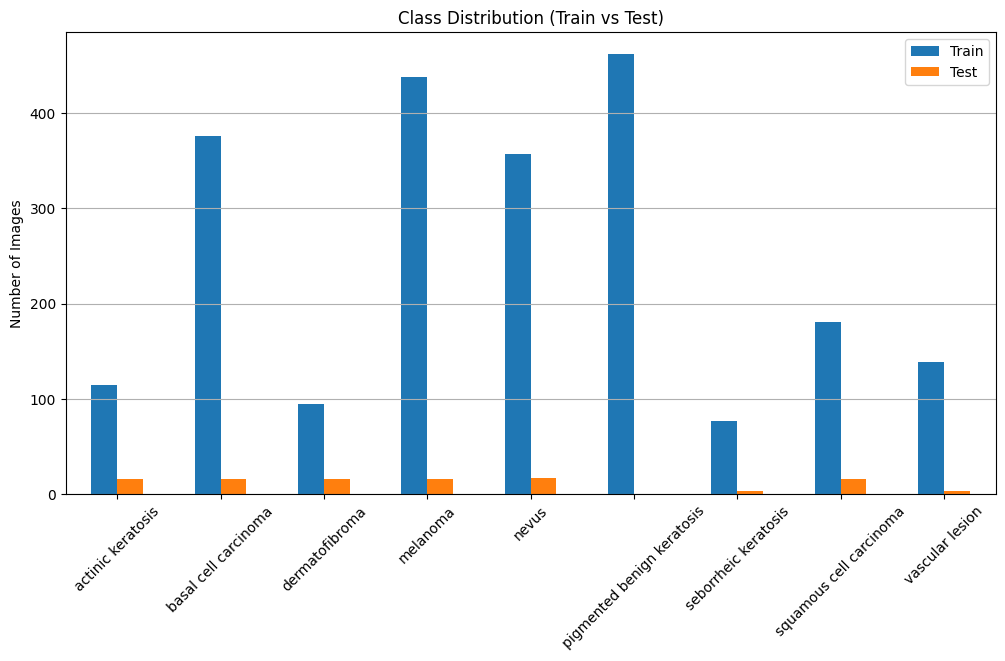

In [15]:
df_counts.plot(
    kind="bar",
    figsize=(12, 6),
    title="Class Distribution (Train vs Test)"
)
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

## Image Size Analysis

In [16]:
def get_image_sizes(base_dir):
    widths, heights = [], []
    
    for cls in os.listdir(base_dir):
        cls_path = os.path.join(base_dir, cls)
        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)
            try:
                with Image.open(img_path) as img:
                    w, h = img.size
                    widths.append(w)
                    heights.append(h)
            except:
                pass
    return widths, heights

In [17]:
train_widths, train_heights = get_image_sizes(TRAIN_DIR)

In [18]:
print(f"Min size: {min(train_widths)}x{min(train_heights)}")
print(f"Max size: {max(train_widths)}x{max(train_heights)}")

Min size: 576x450
Max size: 3872x2592


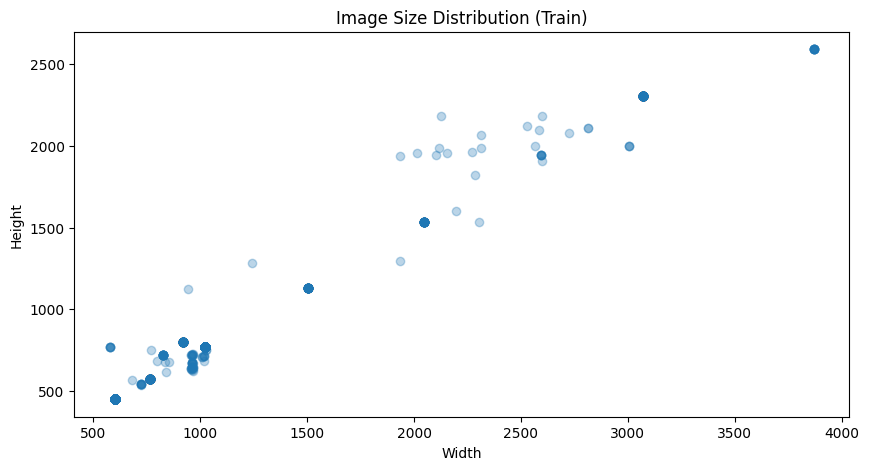

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(train_widths, train_heights, alpha=0.3)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Size Distribution (Train)")
plt.show()

## Sample Images per Class

In [27]:
def plot_samples_per_class(base_dir, n_samples=3):
    classes = sorted(os.listdir(base_dir))
    
    plt.figure(figsize=(n_samples * 3, len(classes) * 3))
    
    for i, cls in enumerate(classes):
        cls_path = os.path.join(base_dir, cls)
        images = os.listdir(cls_path)[:n_samples]
        
        for j, img_name in enumerate(images):
            img_path = os.path.join(cls_path, img_name)
            img = Image.open(img_path)
            
            ax = plt.subplot(len(classes), n_samples, i * n_samples + j + 1)
            ax.imshow(img)
            ax.axis("off")
            
           
            ax.set_title(cls, fontsize=9, y=-0.25)
    
    plt.suptitle("Sample Images per Class", fontsize=16)
    plt.tight_layout()
    plt.show()


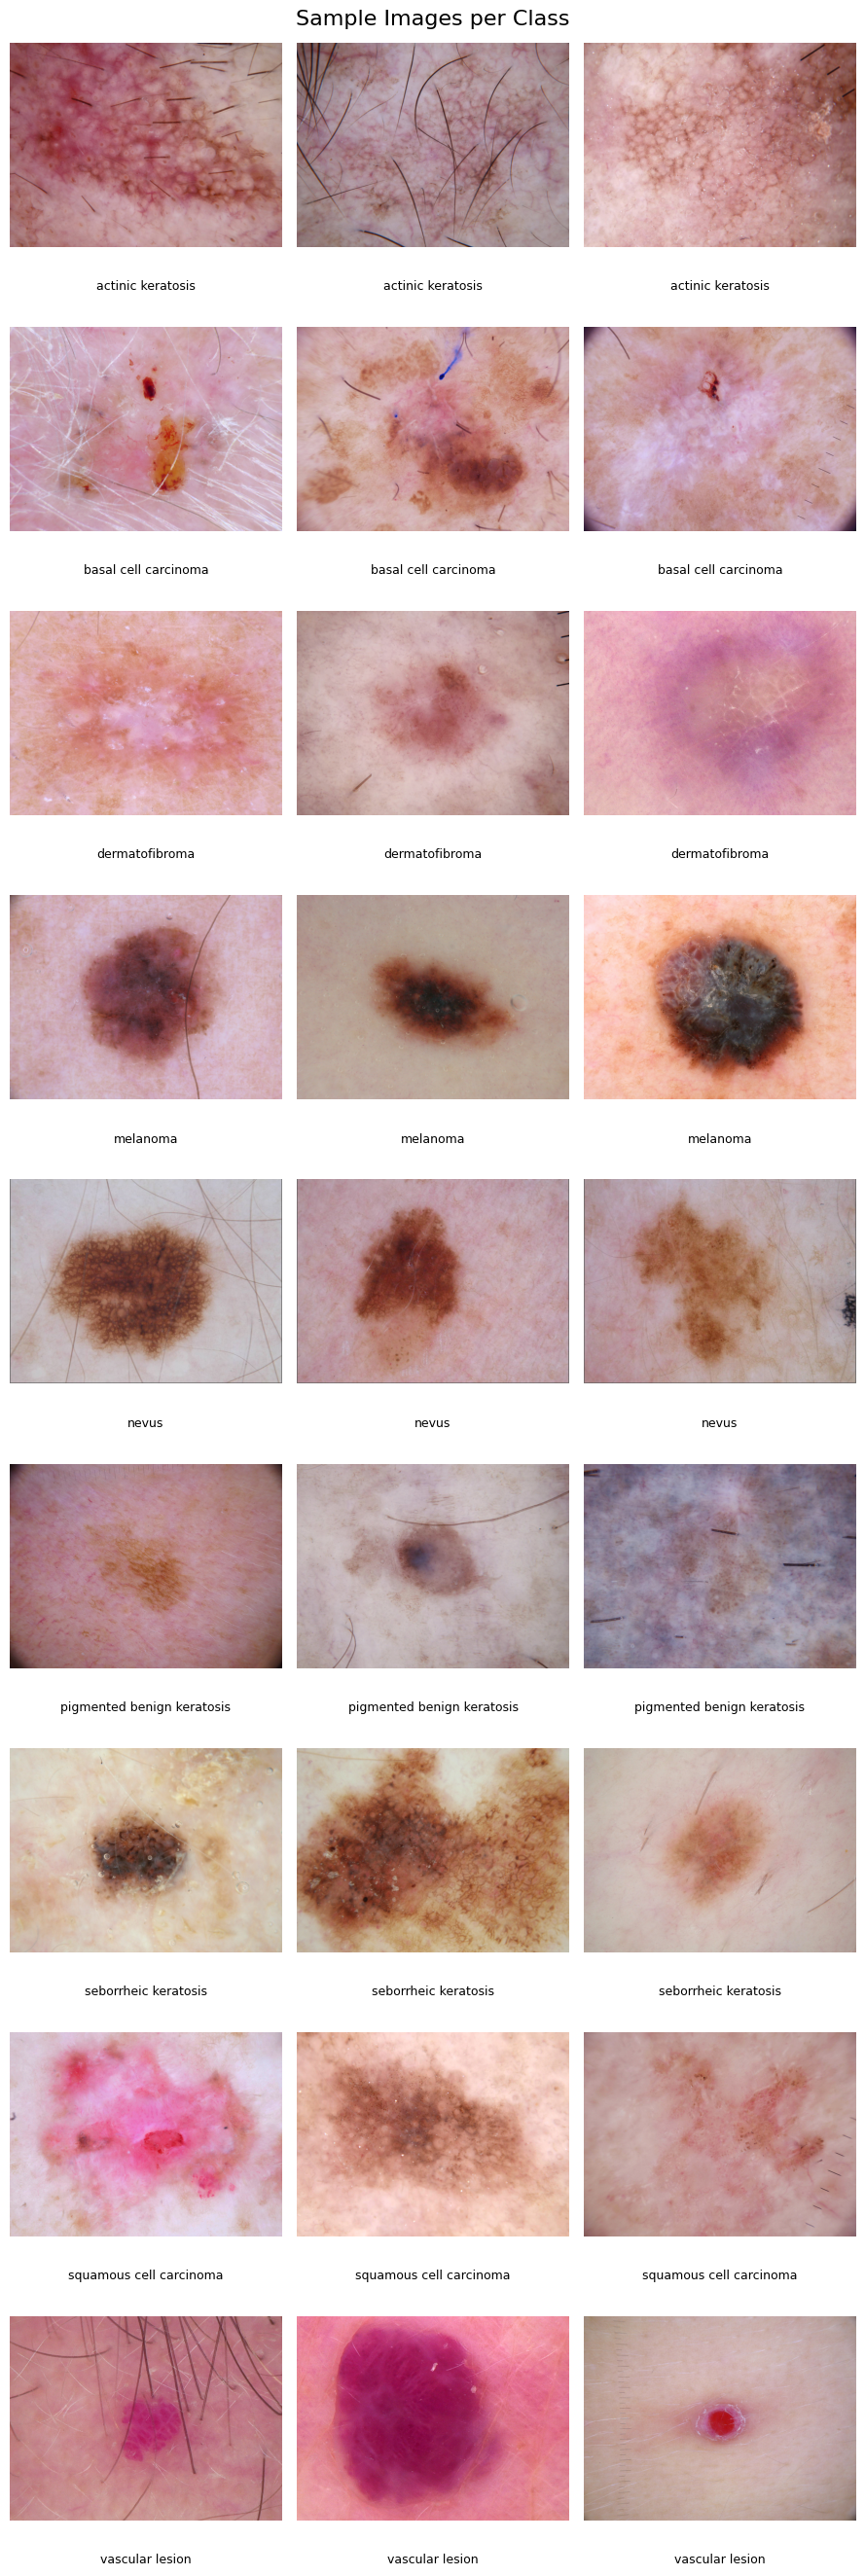

In [28]:
plot_samples_per_class(TRAIN_DIR, n_samples=3)

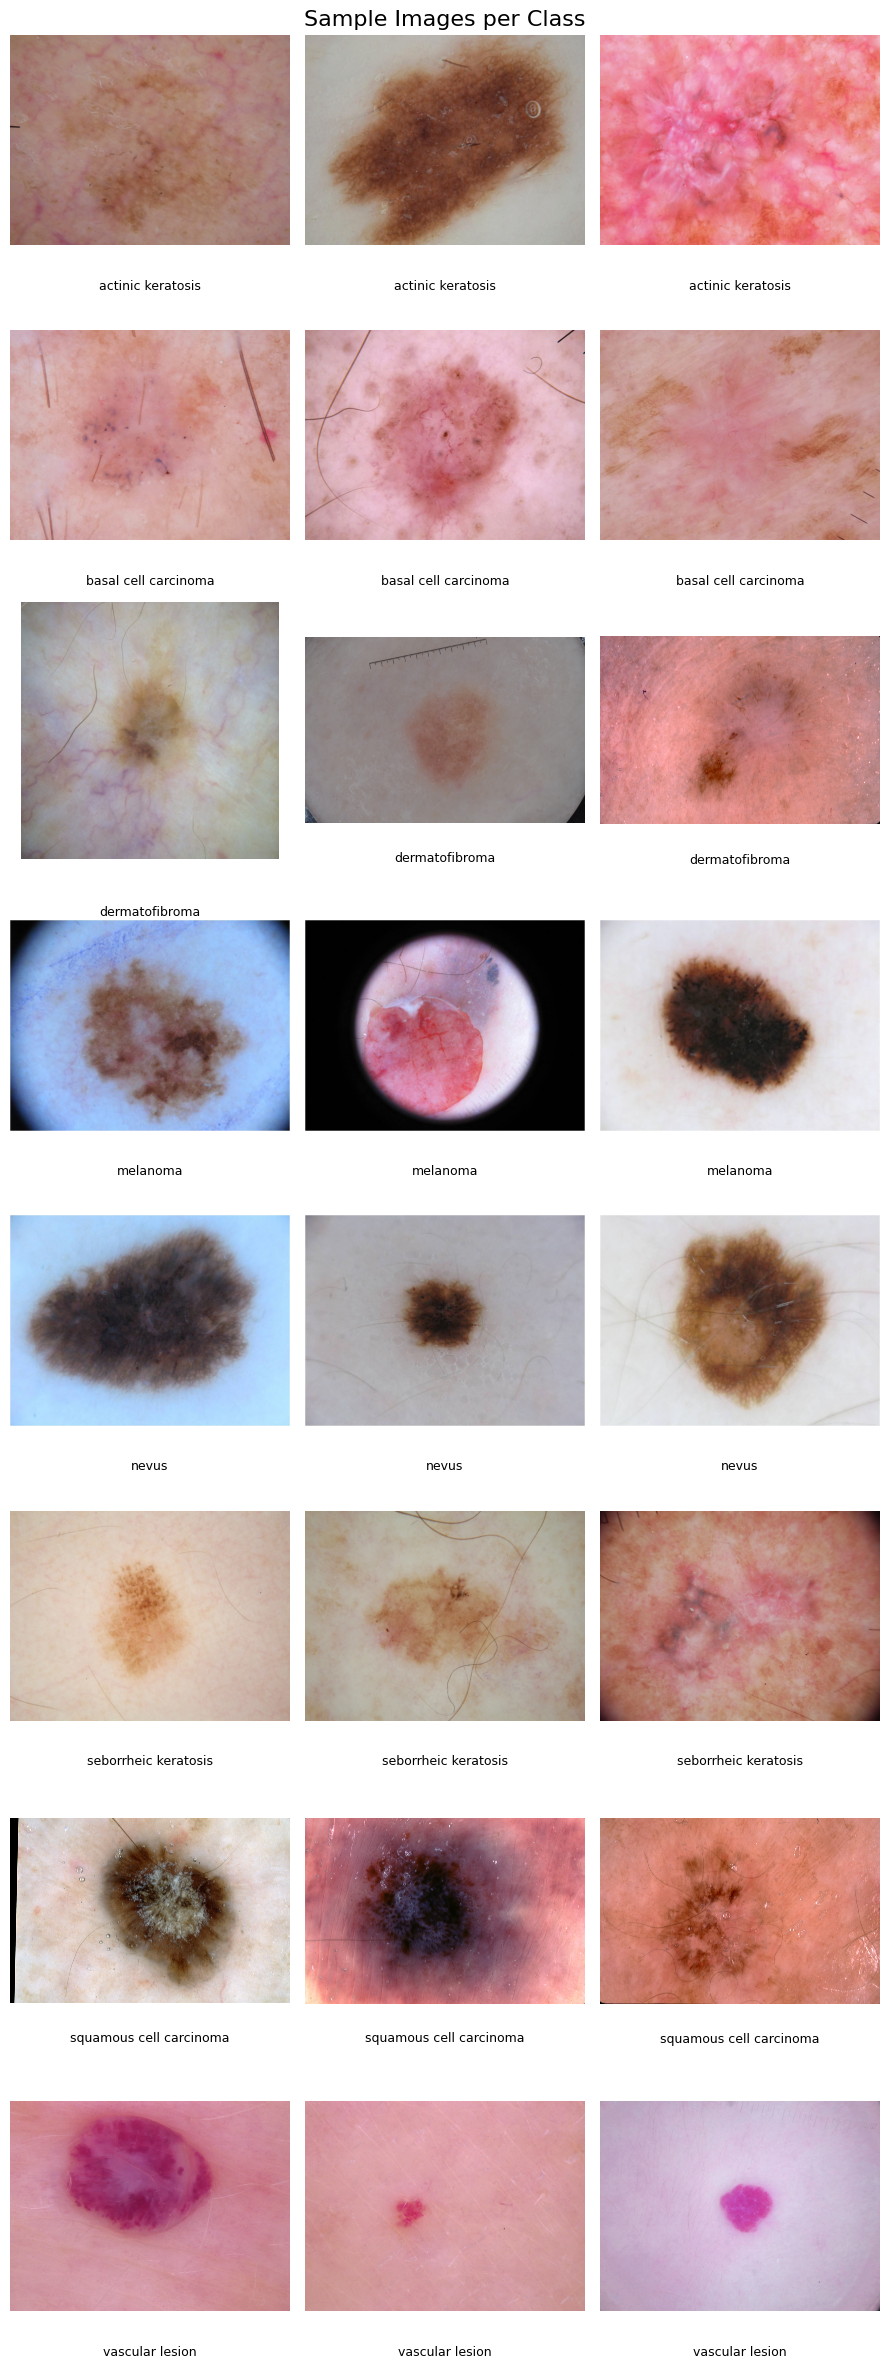

In [29]:
plot_samples_per_class(TEST_DIR, n_samples=3)